<a href="https://colab.research.google.com/github/Worlddatascience/DataScienceCohort/blob/master/Evaluate_your_Models_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##          Stock price forecasting model (For 14 days)
We are going to make a machine learning model that can predict stock prices for up to 14 days using the CNN (Convolutional Neural Network). 

We will use an API to import live and historical data to predict stock price for 14 days stock price.

The data column most important is Close price.

We are going to predict the Closing price. 

Steps to Create our CNN model to predict DraftKing Stock Price:

- STEP 1 - Setup Libraries
-	STEP 2 - Import Data for DraftKing Stock from Alphavantage API
-	STEP 3 - Data Science Analysis on Data using Numpy, Pandas, Keras
- STEP 4 - Setup CNN model
-	STEP 5 - Predict Stock Price 
- STEP 6 - Create Data Visualization



# STEP 1 - Setup Libraries


In [1]:
#These number symbols are used to add comments (comments are used to explain code)
import numpy as np #Numpy provides fast mathematical function processing 
import pandas as pd #Used for high level Data Indexing processes
import matplotlib.pyplot as plt #Python and Machine Learning library to create plots and data visualizations
import seaborn as sns; sns.set() #High Level Data Visualization library

### Getting the Data

#You have to go to Alphavantage to get a custom API Key

https://www.alphavantage.co/

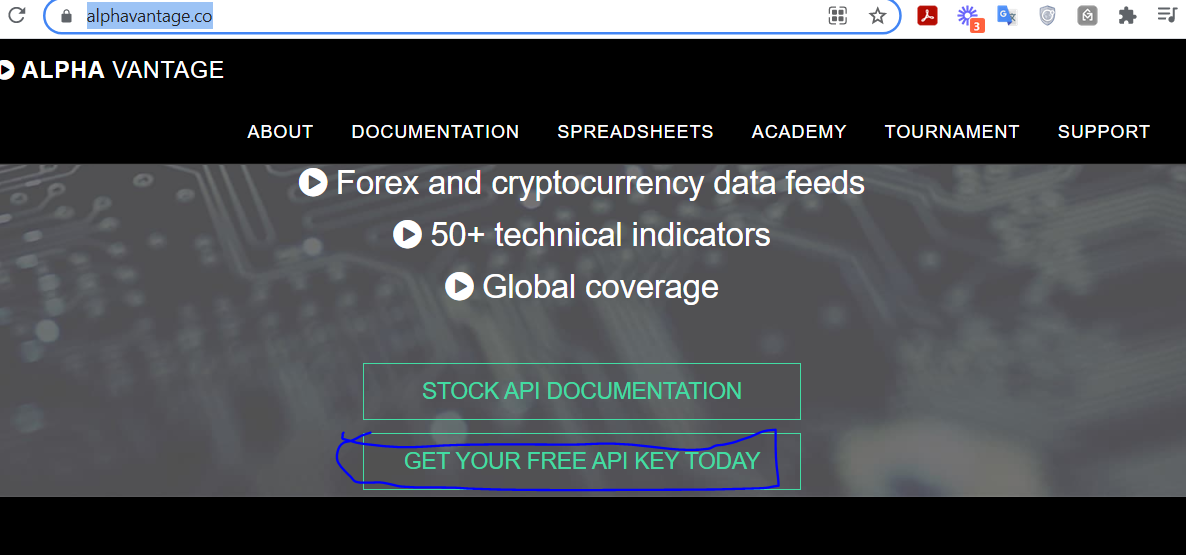

Once you get API then you choose Stock API Documentation Daily 
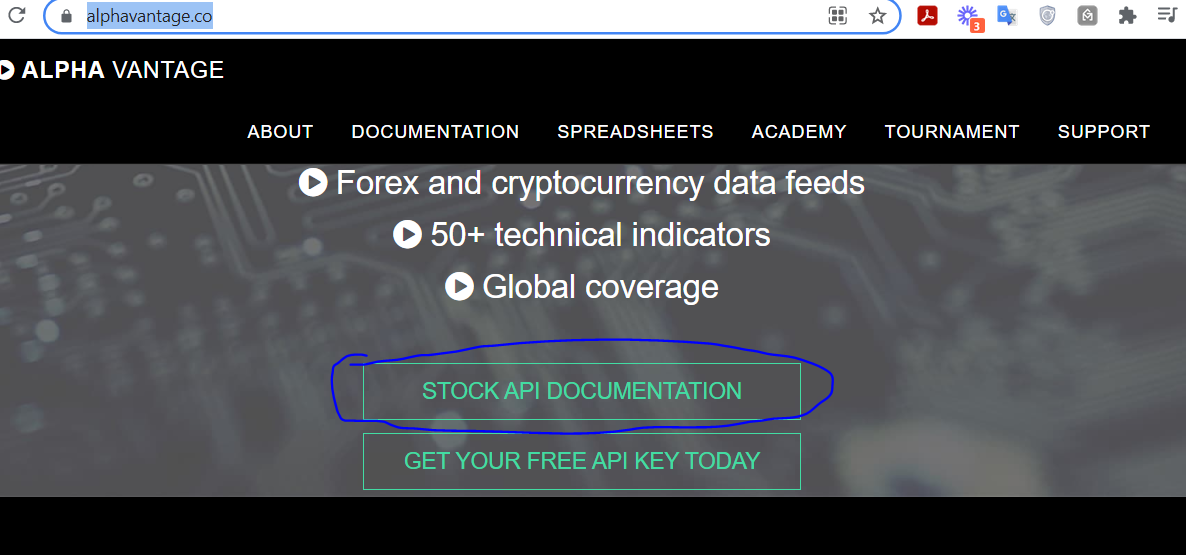

Then we use the code provided 
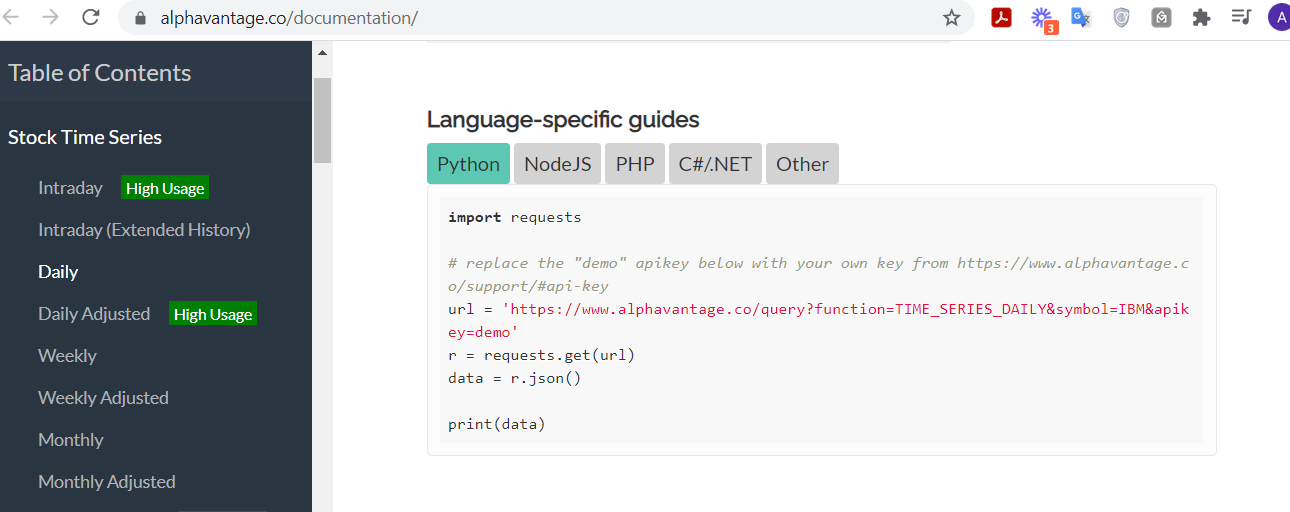

# STEP 2 - Import Data for DraftKing Stock from Alphavantage API


In [2]:
#This code pulls the data from the alphavantage API 

import requests
API_KEY = '95S05BV544RHKOJT' 
ticker="DKNG" #if you want to change stock change the ticker we will use "DKNG" for Draftkings Stock
r = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol="+ticker+"&apikey="+API_KEY)
if (r.status_code == 200):
  print(r.json())

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'DKNG', '3. Last Refreshed': '2021-09-03', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2021-09-03': {'1. open': '61.0700', '2. high': '61.1401', '3. low': '60.0400', '4. close': '61.0200', '5. volume': '6946596'}, '2021-09-02': {'1. open': '60.6000', '2. high': '61.6800', '3. low': '59.8400', '4. close': '61.0700', '5. volume': '8372662'}, '2021-09-01': {'1. open': '59.3800', '2. high': '61.5900', '3. low': '59.3000', '4. close': '60.2100', '5. volume': '11668098'}, '2021-08-31': {'1. open': '59.4200', '2. high': '60.4000', '3. low': '58.7600', '4. close': '59.2900', '5. volume': '14993859'}, '2021-08-30': {'1. open': '60.1100', '2. high': '60.3800', '3. low': '58.6500', '4. close': '59.2500', '5. volume': '11664856'}, '2021-08-27': {'1. open': '58.1400', '2. high': '61.7700', '3. low': '57.8000', '4. close': '60.0100', '5. volume': '13053151'}, '2

#	STEP 3 - Data Science Analysis on Data using Numpy, Pandas, Keras


In [3]:
def clean_data(data):
    #Raw data from API 
    df = pd.DataFrame.from_dict(data, orient="index")

    #Transposing Data and Taking column with data
    df2 = (df.T['Time Series (Daily)'])

    #Remove Null/NAN values
    df2 = df2.dropna()
    
    #We will take the data from this and use it to index our dataframe 
    df_convert = df2.to_frame()

    #We will take the data from this and use it to index our dataframe 
    df_index = list(df_convert.index)

    #Convert to cleaned dataframe 
    df2 = pd.json_normalize(df2)
    
    #We add this list to the dataframe with our actual data
    df2['Index'] = df_index

    #We then set the index column as our actual index
    df2 = df2.set_index('Index')

    #Put the data in the correct order
    df2 = df2[::-1]
    return df2

In [4]:
df=clean_data(r.json())

In [5]:
df #See truncated data frame

,1. open,2. high,3. low,4. close,5. volume
Index,,,,,
2021-04-15,59.6652,59.6652,56.7600,57.4800,11994251
2021-04-16,59.5150,59.9790,57.8300,57.9800,15202808
2021-04-19,57.0200,58.7700,55.6400,56.6800,15947361
2021-04-20,56.0000,57.0499,53.7600,55.7100,11987693
2021-04-21,55.4900,58.8300,54.8900,58.7800,12019613
...,...,...,...,...,...
2021-08-30,60.1100,60.3800,58.6500,59.2500,11664856
2021-08-31,59.4200,60.4000,58.7600,59.2900,14993859
2021-09-01,59.3800,61.5900,59.3000,60.2100,11668098


In [6]:
pd.options.display.max_rows=100 #This is the code to display max rows

In [7]:
df 

,1. open,2. high,3. low,4. close,5. volume
Index,,,,,
2021-04-15,59.6652,59.6652,56.7600,57.4800,11994251
2021-04-16,59.5150,59.9790,57.8300,57.9800,15202808
2021-04-19,57.0200,58.7700,55.6400,56.6800,15947361
2021-04-20,56.0000,57.0499,53.7600,55.7100,11987693
2021-04-21,55.4900,58.8300,54.8900,58.7800,12019613
2021-04-22,59.2700,59.6690,56.5100,57.1700,12904224
2021-04-23,57.2500,58.4500,57.2400,58.1200,10196919
2021-04-26,58.1500,59.4590,57.5601,59.2300,8011201
2021-04-27,60.8400,62.2700,58.8800,59.1300,13370397


In [8]:
df.dtypes #check data types of each column

1. open      object
2. high      object
3. low       object
4. close     object
5. volume    object
dtype: object

We need to convert the datetype from an object to a number (float or integer).

A float is a number with a decimal.

A integer is a whole number.

In [9]:
def conv_types(data):
    data.index=pd.to_datetime(data.index) #convert the index to a datetime object for plotting
    #convert each column to integers for plotting and model input
    data['1. open']=pd.to_numeric(data['1. open'])
    data['2. high']=pd.to_numeric(data['2. high'])
    data['3. low']=pd.to_numeric(data['3. low'])
    data['4. close']=pd.to_numeric(data['4. close'])
    data['5. volume']=pd.to_numeric(data['5. volume'])
    return df

In [10]:
df=conv_types(df)

In [11]:
df.dtypes #verify type conversions

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume      int64
dtype: object

In [12]:
def plot_data(data):
    plt.figure(figsize=(22,6)) #set the size of the figure
    plt.subplot(1,2,1)
    #create two subplots - one for daily prices, one for daily volume
    plt.plot(data['1. open'], color='blue', label="Open")
    plt.plot(data['2. high'], color='green', label="High")
    plt.plot(data['3. low'], color='red', label="Low")
    plt.plot(data['4. close'], color='purple', label="Close")
    plt.title(str("DraftKings ($DKNG) Daily Stock Price\n"+str(data.index[0].date())+" to "+str(data.index[-1].date())))
    plt.xlabel("Date")
    plt.ylabel("Price in USD")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(data['5. volume'], color='orange', label="Volume")
    plt.title(str("DraftKings ($DKNG) Daily Trading Volume\n"+str(data.index[0].date())+" to "+str(data.index[-1].date())))
    plt.xlabel("Date")
    plt.ylabel("Trading Volume in millions")
    plt.show()

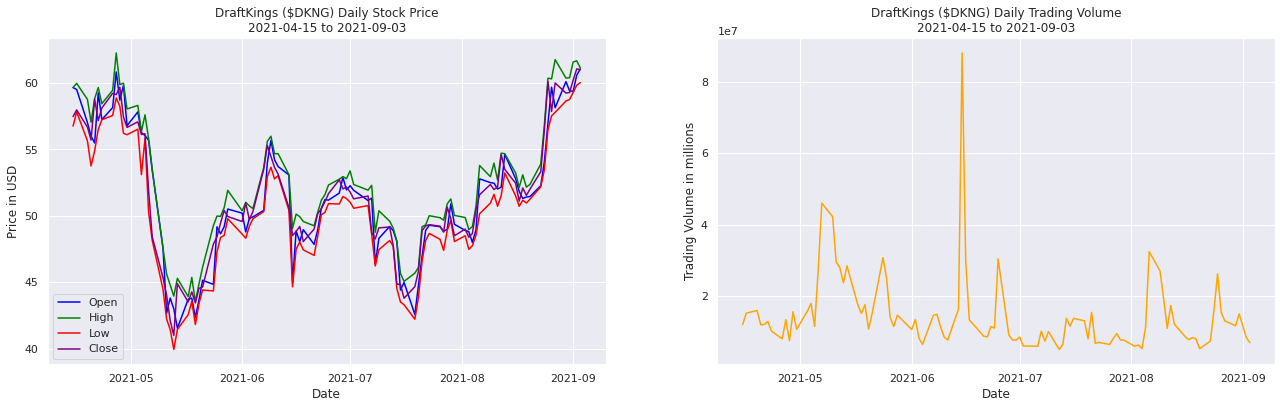

In [13]:
plot_data(df)

## Setting up the Model

### Preprocessing

In [14]:
#helper function to split the time series (explained in next block of code)
def split_sequence(sequence, n_steps):
	X, y = list(), list() #create empty lists to store X and y variables
	for i in range(len(sequence)):

		# find the end of this pattern
		end_ix = i + n_steps

		# check if we are beyond the sequence
		#if we are, simply stop executing this block of code
		if end_ix > len(sequence)-1:
			break

		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
 	

In [15]:
seq_length = 5 #seq_length tells how many sequential data points are used for each element of the array
#5 means 5 data points will be used at a time
#for instance, the first element of the array will be data points 1-5
#the second element of the array will be data points 2-6
#third element will be data points 3-7, and so on

#we only need the close price data for our model
data = np.array(df['4. close'])

#splitting the data with our helper function
X, y = split_sequence(data, seq_length)

In [16]:
#reshape from [samples, timesteps] into [samples, timesteps, features] for training the model
#the model requires these three values for input
n_features = 1 #our only feature, or input variable, is the closing stock price
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Constructing the model layers

In [17]:
import tensorflow as tf #backend for keras
from tensorflow import keras #used for creating the CNN model
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers.convolutional import Conv1D, MaxPooling1D #the data is 1-dimensional so we will use a 1d convolution layer

In [18]:
#define/setup model
model = Sequential()

#add a 1d convolutional layer
#64 filters used in the convolution operation (a somewhat arbitrary choice)
#kernel_size of 2 means the convolutional layer reads 2 data points at a time, applies the filters, and outputs it to the next layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, n_features)))

#add a pooling layer, which reduces the dimensionality of the input size
#takes the max value of each window of length 2
model.add(MaxPooling1D(pool_size=2))

#flattens the data into a 1d vector - first layer of the fully connected layers
model.add(Flatten())

#dense layer with relu activation
#outputs zero for values less than or equal to zero and keeps positive values the same
model.add(Dense(50, activation='relu'))

#1d dense layer to generate the predicted value
#only 1 dimensional because only one value is being predicted at each time point
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

### Fitting the model

In [19]:
#the model is fitted on the training data over 100 epochs to improve and update its parameters
#verbose controls how detailed the output is when training the model
def fit_model(X, y):
    """Trains the neural network"""
    model.fit(X, y, epochs=100, verbose=2)

In [ ]:
fit_model(X,y)

## Creating the predictions

In [21]:
DAYS_TO_PREDICT = 14
def make_predictions(X, DAYS_TO_PREDICT):
    test_seq = X[-1:] #set the test sequence to start at the most recent stock values
    preds = [] #create empty list to store predictions

    #create predictions using most recent 5 data points
    #the first prediction will assist in making the second prediction, and so on
    for _ in range(DAYS_TO_PREDICT):
        y_test_pred = model(test_seq) #outputs the prediction from our test sequence
        pred = y_test_pred #assign pred to the raw output of the model for rebuilding new_seq and test_seq
        preds.append(y_test_pred) #add the prediction to the list we will use for plotting
        new_seq = test_seq.flatten() #flatten the output from the model into a 1d array
        new_seq = np.append(new_seq, [pred]) #add prediction to the list the model is using to make predictions
        new_seq = new_seq[1:] #exclude the first element from the list; use our most recent prediction for the next prediction instead
        test_seq = new_seq.reshape(1, seq_length, 1) #reshape for the model
    preds=np.array(preds).reshape(DAYS_TO_PREDICT,) #reshape the prediction array for plotting
    return preds

In [22]:
predicted_price=make_predictions(X, 14)

In [23]:
def make_pred_index(data, preds):
    """creating the datetime index for our predictions to be just after our actual data"""
    predicted_index = pd.date_range(start=data.index[-1], #start 1 day beyond existing data
                                    periods=DAYS_TO_PREDICT+1, #run time interval through days predicted
                                    closed='right') #include the last value of the time frame
    return predicted_index

def make_pred_series(preds, predicted_index):
    """create new series of predicted prices with corresponding dates predicted"""
    predicted_price = pd.Series(data=preds,
                                index=predicted_index)
    return predicted_price

In [24]:
predicted_index = make_pred_index(df, predicted_price)
predicted_price = make_pred_series(predicted_price, predicted_index)

In [25]:
(df, predicted_price) #This will give us stock price prediction from today and 14 days in the future

(            1. open  2. high   3. low  4. close  5. volume
 Index                                                     
 2021-04-15  59.6652  59.6652  56.7600     57.48   11994251
 2021-04-16  59.5150  59.9790  57.8300     57.98   15202808
 2021-04-19  57.0200  58.7700  55.6400     56.68   15947361
 2021-04-20  56.0000  57.0499  53.7600     55.71   11987693
 2021-04-21  55.4900  58.8300  54.8900     58.78   12019613
 2021-04-22  59.2700  59.6690  56.5100     57.17   12904224
 2021-04-23  57.2500  58.4500  57.2400     58.12   10196919
 2021-04-26  58.1500  59.4590  57.5601     59.23    8011201
 2021-04-27  60.8400  62.2700  58.8800     59.13   13370397
 2021-04-28  58.7200  59.8900  58.2500     59.69    7501885
 2021-04-29  59.8200  59.9900  56.2200     57.46   15592771
 2021-04-30  56.7900  58.0500  56.1100     56.66   10668282
 2021-05-03  57.8300  58.3200  56.5300     57.08   15797669
 2021-05-04  56.2700  56.3400  53.1025     56.13   17944177
 2021-05-05  56.0465  57.6099  55.8343  

### Visualizing the predictions

In [26]:
def plot_predictions(data, predictions):
    """Takes the dataframe of historical data and Series of predictions as input"""
    plt.figure(figsize=(15,6))
    plt.plot(data['4. close'][:-1], #plot data used for training the model
         label='Historical Daily Price')
    
    plt.plot(predictions, '.-', #plot predictions
             label='Predicted Daily Price')
    plt.title("DraftKings daily closing price (2020)\nPrediction for "+str(predictions.index[0].date())+" to "+str(predictions.index[-1].date()))
    plt.legend()
    plt.show()

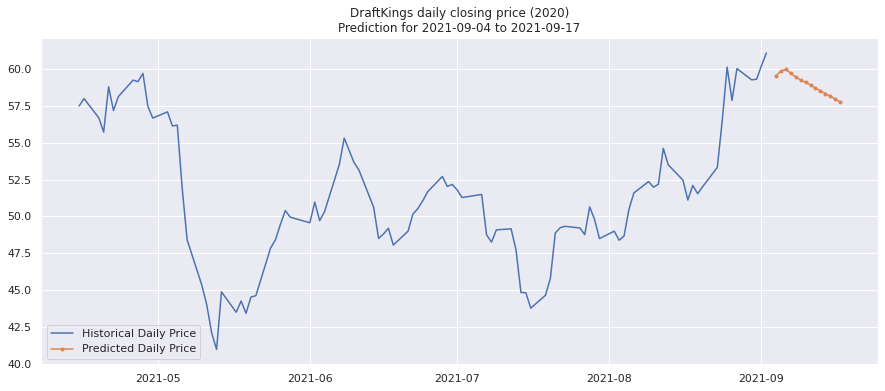

In [27]:
plot_predictions(df, predicted_price)

# Congratulations! We used a Deep Learning Convolutional Neural Network to create a Stock Price Prediction Model. In blue we see the historical price stock price and in Orange we see the prediction for 14 days into the future.  